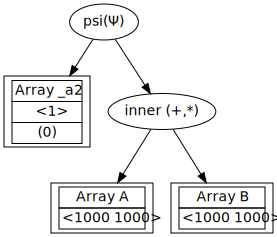

In [2]:
from moa.frontend import LazyArray

_A = LazyArray(shape=(1000, 1000), name='A')
_B = LazyArray(shape=(1000, 1000), name='B')

expression = _A.inner('+', '*', _B)[0]
expression

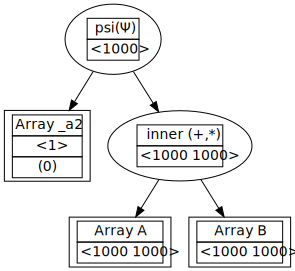

In [3]:
expression.visualize(stage='shape')

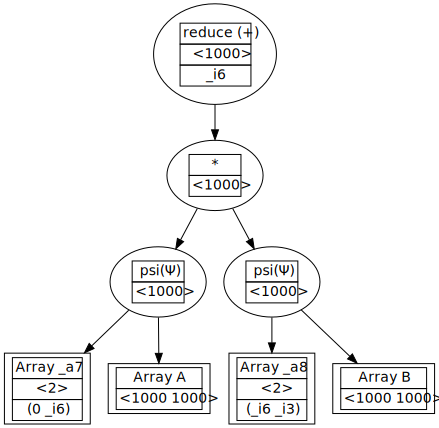

In [4]:
expression.visualize(stage='dnf')

In [5]:
print(expression.compile(use_numba=True))



@numba.jit
def f(A, B):
    
    
    if (not ((len(B.shape) == 2) and (len(A.shape) == 2))):
        
        raise Exception('arguments have invalid dimension')
    
    if (not ((1000 == B.shape[1]) and ((1000 == B.shape[0]) and ((1000 == A.shape[1]) and (1000 == A.shape[0]))))):
        
        raise Exception('arguments do not match declared shape')
    
    _a21 = numpy.zeros(())
    
    _a19 = numpy.zeros((1000,))
    
    for _i3 in range(0, 1000, 1):
        
        _a21 = 0
        
        for _i6 in range(0, 1000, 1):
            
            _a21 = (_a21 + (A[(0, _i6)] * B[(_i6, _i3)]))
        
        _a19[(_i3,)] = _a21
    return _a19


In [6]:
import numba
import numpy

A = numpy.random.random((1000, 1000))
B = numpy.random.random((1000, 1000))

exec(expression.compile(use_numba=True))

In [10]:
%%timeit

f(A=A, B=B)

2.38 ms ± 35.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
result = f(A=A, B=B)
result[0]

259.6698510275287

In [8]:
%%timeit

A.dot(B)[0]

50.6 ms ± 2.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
result = A.dot(B)[0]
result[0]

259.66985102752875